Total In and Out:
 in     503929
out    493908
dtype: int64
Grouped In and Out:
          in     out
gid                
A    132680  127141
B    127103  130643
C    121694  117519
D    122452  118605


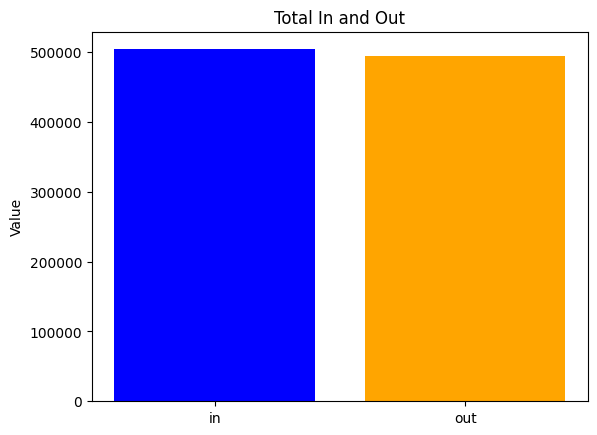

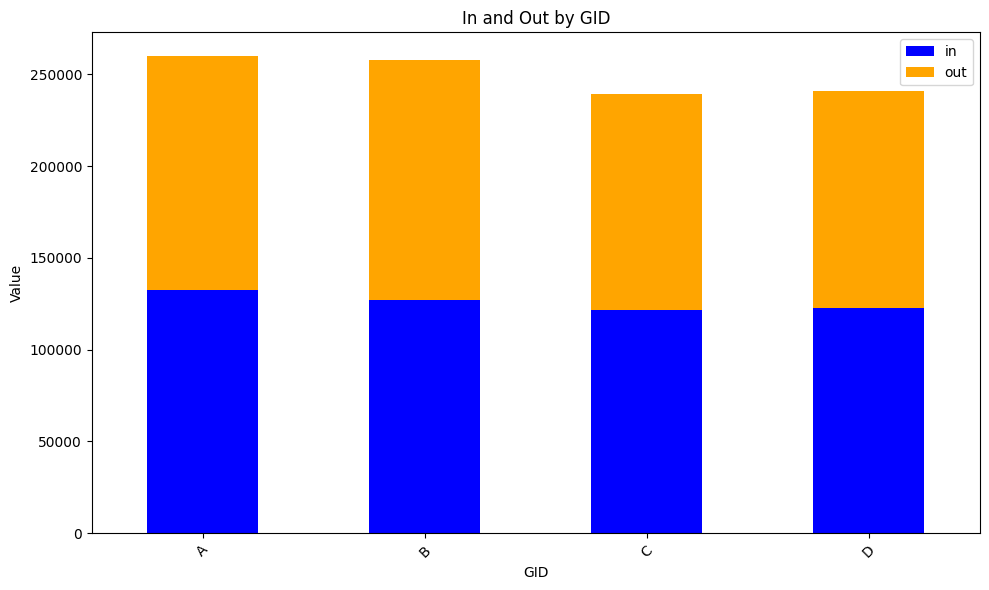

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 Parquet 文件
file_path = "test_data.parquet"
df = pd.read_parquet(file_path)

# 1. 计算总 in 和 out
total_in_out = df[['in', 'out']].sum()
print("Total In and Out:\n", total_in_out)

# 2. 按 gid 分组统计
grouped_in_out = df.groupby('gid')[['in', 'out']].sum()
print("Grouped In and Out:\n", grouped_in_out)

# 3. 数据可视化 - 总 in 和 out
plt.bar(['in', 'out'], total_in_out, color=['blue', 'orange'])
plt.title("Total In and Out")
plt.ylabel("Value")
plt.show()

# 4. 数据可视化 - 按 GID 分组
grouped_in_out.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(10, 6))
plt.title("In and Out by GID")
plt.xlabel("GID")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Descriptive Statistics:
                       date           in         out
count                 1000  1000.000000  1000.00000
mean   2024-05-14 12:00:00   503.929000   493.90800
min    2023-01-01 00:00:00     0.000000     0.00000
25%    2023-09-07 18:00:00   242.750000   227.75000
50%    2024-05-14 12:00:00   505.000000   500.00000
75%    2025-01-19 06:00:00   757.250000   763.75000
max    2025-09-26 00:00:00   998.000000   997.00000
std                    NaN   289.998108   298.60317


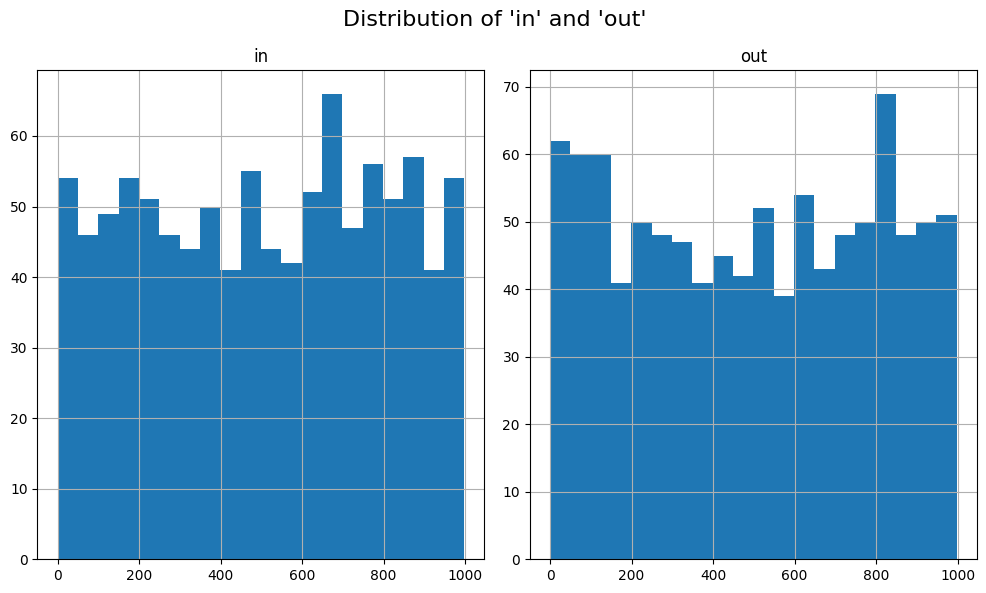

Range of 'in': 998
Range of 'out': 997
Correlation Matrix:
            in       out
in   1.000000 -0.015338
out -0.015338  1.000000


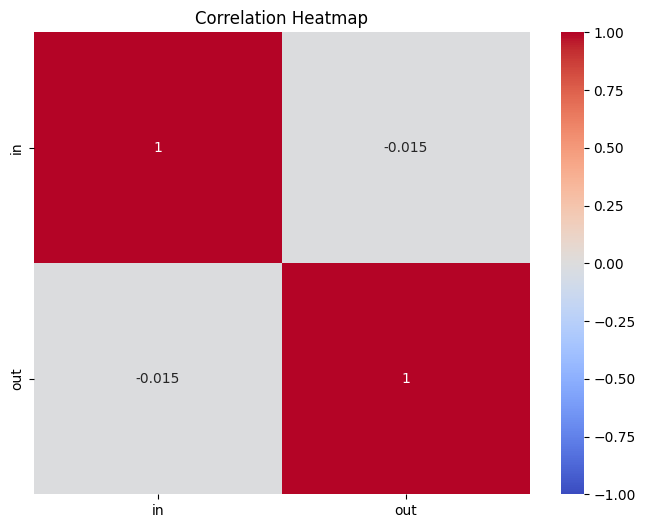


Grouped Descriptive Statistics by GID:
                   in            out
count       4.000000       4.000000
mean   125982.250000  123477.000000
std      5065.164978    6429.375294
min    121694.000000  117519.000000
25%    122262.500000  118333.500000
50%    124777.500000  122873.000000
75%    128497.250000  128016.500000
max    132680.000000  130643.000000


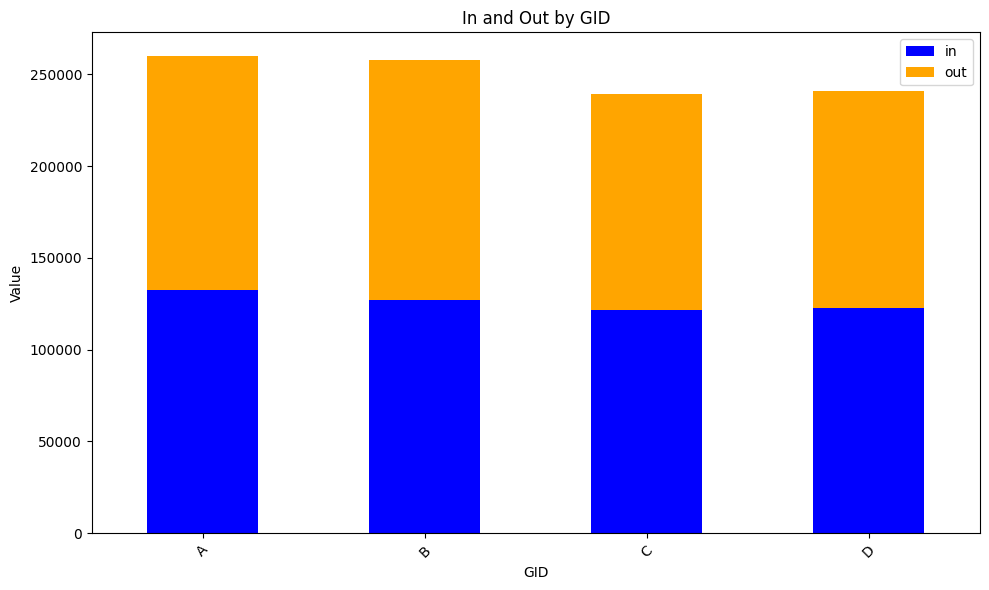

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取 Parquet 文件
file_path = "test_data.parquet"
df = pd.read_parquet(file_path)

# 1. 数据的分布情况（描述性统计 + 直方图）
print("Descriptive Statistics:\n", df.describe())

# 可视化 - 直方图
df[['in', 'out']].hist(bins=20, figsize=(10, 6))
plt.suptitle("Distribution of 'in' and 'out'", fontsize=16)
plt.tight_layout()
plt.show()

# 2. 极差（最大值和最小值差）
range_in = df['in'].max() - df['in'].min()
range_out = df['out'].max() - df['out'].min()
print(f"Range of 'in': {range_in}")
print(f"Range of 'out': {range_out}")

# 3. 相关性分析及其图示
correlation = df[['in', 'out']].corr()
print("Correlation Matrix:\n", correlation)

# 可视化 - 相关性热力图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# 4. 按 gid 分组的分布分析及可视化
grouped = df.groupby('gid')[['in', 'out']].sum()

# 描述性统计 - 按 gid 分组
print("\nGrouped Descriptive Statistics by GID:\n", grouped.describe())

# 可视化 - 按 GID 分组的 'in' 和 'out' 总和
grouped.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(10, 6))
plt.title("In and Out by GID")
plt.xlabel("GID")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\wuwenbo\AppData\Local\Temp\ipykernel_17908\4077946793.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').sum()
C:\Users\wuwenbo\AppData\Local\Temp\ipykernel_17908\4077946793.py:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = df.resample('Y').sum()


Monthly Data:
                  in           out
count     33.000000     33.000000
mean   15270.575758  14966.909091
std     1642.553539   1616.491172
min    11968.000000   9926.000000
25%    13742.000000  14067.000000
50%    15325.000000  14982.000000
75%    16637.000000  16105.000000
max    18620.000000  17779.000000
Yearly Data:
                   in            out
count       3.000000       3.000000
mean   167976.333333  164636.000000
std     32145.227598   29558.097418
min    130873.000000  131227.000000
25%    158247.000000  153260.500000
50%    185621.000000  175294.000000
75%    186528.000000  181340.500000
max    187435.000000  187387.000000


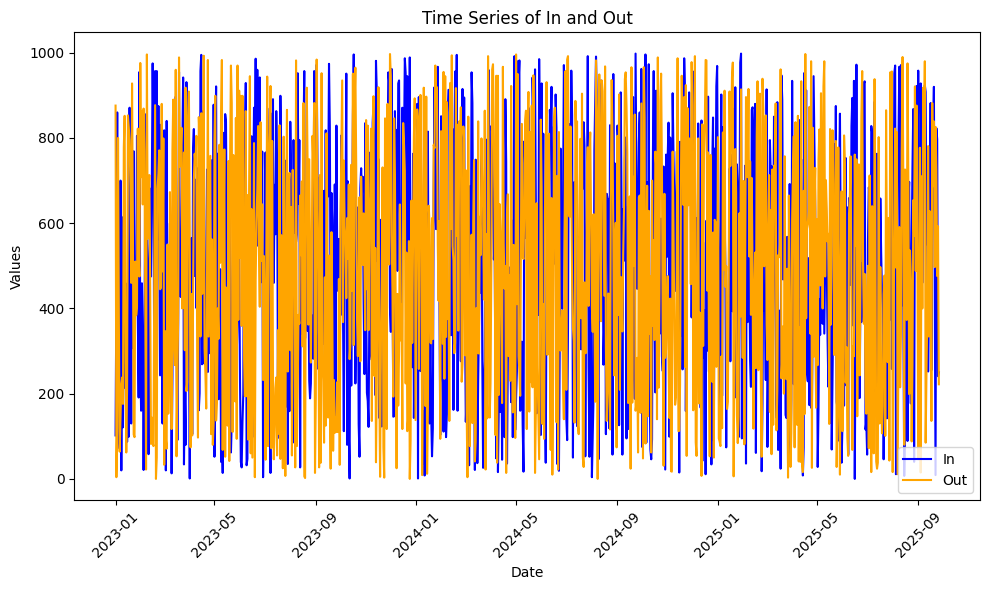

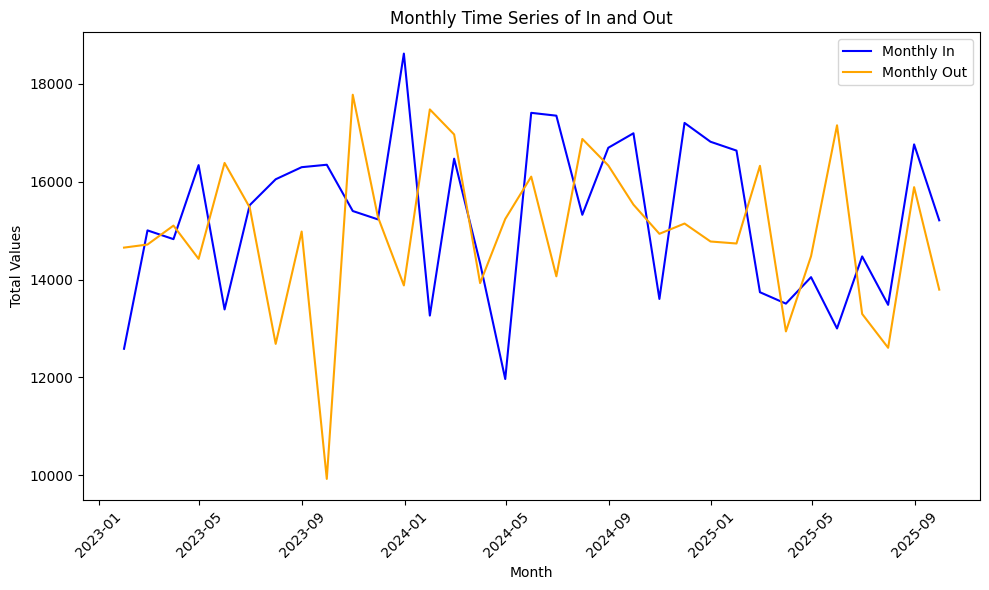

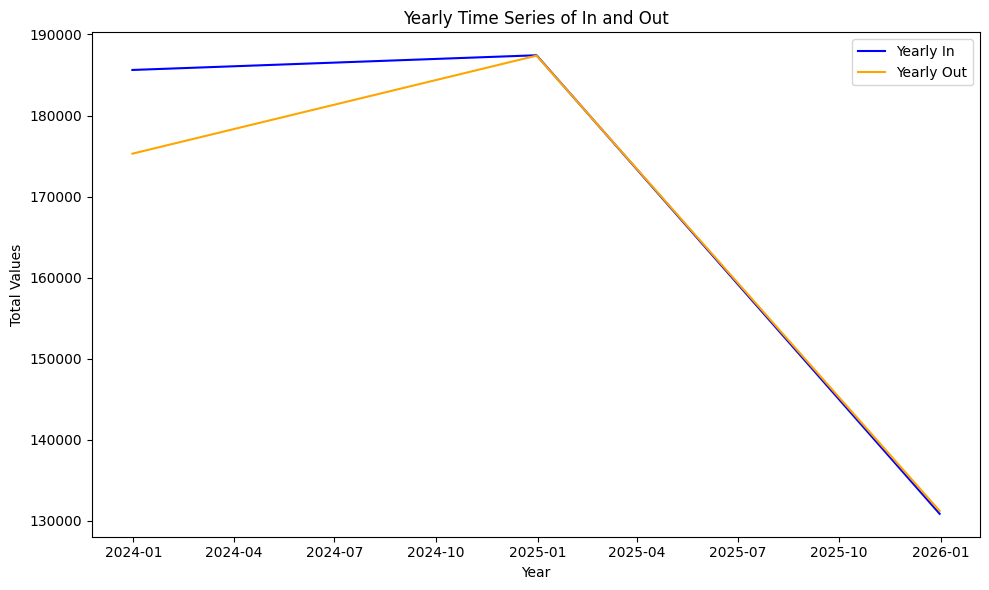

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取 Parquet 文件
file_path = "test_data.parquet"
df = pd.read_parquet(file_path)

# 1. 确保日期列是 Datetime 类型
df['date'] = pd.to_datetime(df['date'])

# 2. 设置日期为索引
df.set_index('date', inplace=True)

# 3. 时序数据的描述性统计（按年、月统计）
# 每月统计 in 和 out 的总和
monthly_data = df.resample('M').sum()

print("Monthly Data:\n", monthly_data.describe())

# 每年统计 in 和 out 的总和
yearly_data = df.resample('Y').sum()

print("Yearly Data:\n", yearly_data.describe())

# 4. 时序线形图 - 总体趋势
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['in'], label='In', color='blue')
plt.plot(df.index, df['out'], label='Out', color='orange')
plt.title('Time Series of In and Out')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. 时序线形图 - 按月显示
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['in'], label='Monthly In', color='blue')
plt.plot(monthly_data.index, monthly_data['out'], label='Monthly Out', color='orange')
plt.title('Monthly Time Series of In and Out')
plt.xlabel('Month')
plt.ylabel('Total Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. 时序分布特征 - 查看每年和每月的趋势
# 按年分组并绘制趋势
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data['in'], label='Yearly In', color='blue')
plt.plot(yearly_data.index, yearly_data['out'], label='Yearly Out', color='orange')
plt.title('Yearly Time Series of In and Out')
plt.xlabel('Year')
plt.ylabel('Total Values')
plt.legend()
plt.tight_layout()
plt.show()


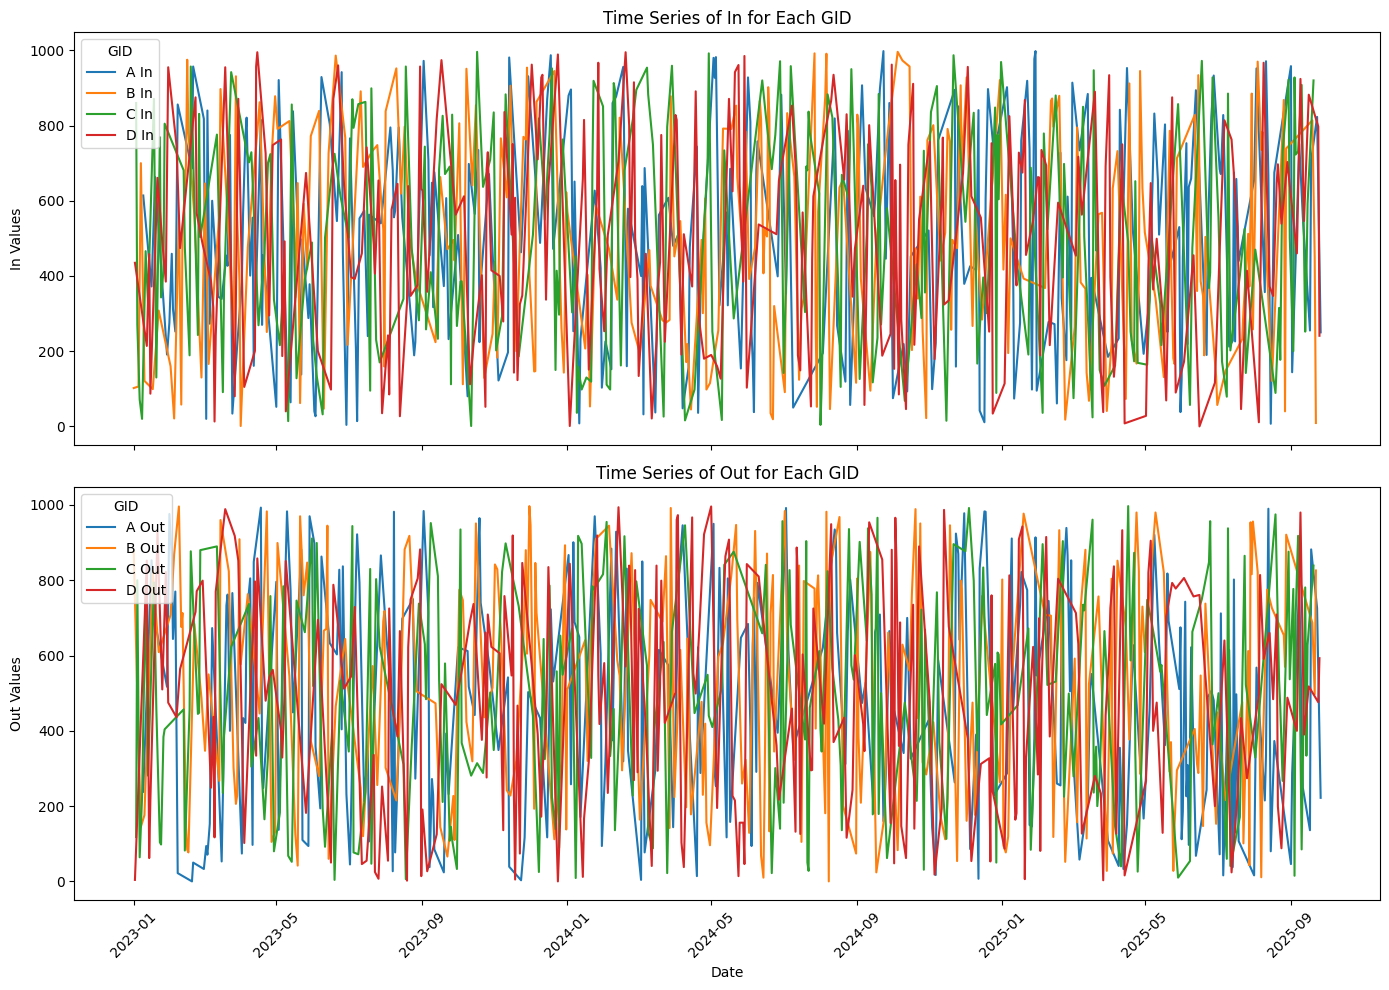

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取 Parquet 文件
file_path = "test_data.parquet"
df = pd.read_parquet(file_path)

# 1. 确保日期列是 Datetime 类型
df['date'] = pd.to_datetime(df['date'])

# 2. 设置日期为索引
df.set_index('date', inplace=True)

# 3. 按 'gid' 分组
gid_groups = df.groupby('gid')

# 4. 创建图表 - 分成两个子图
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# 5. 绘制 'in' 数据的子图
for gid, group in gid_groups:
    axes[0].plot(group.index, group['in'], label=f'{gid} In', linestyle='-')#, marker='o')

axes[0].set_title('Time Series of In for Each GID')
axes[0].set_ylabel('In Values')
axes[0].legend(title="GID", loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# 6. 绘制 'out' 数据的子图
for gid, group in gid_groups:
    axes[1].plot(group.index, group['out'], label=f'{gid} Out', linestyle='-')#, marker='x')

axes[1].set_title('Time Series of Out for Each GID')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Out Values')
axes[1].legend(title="GID", loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

# 7. 调整布局并显示图表
plt.tight_layout()
plt.show()


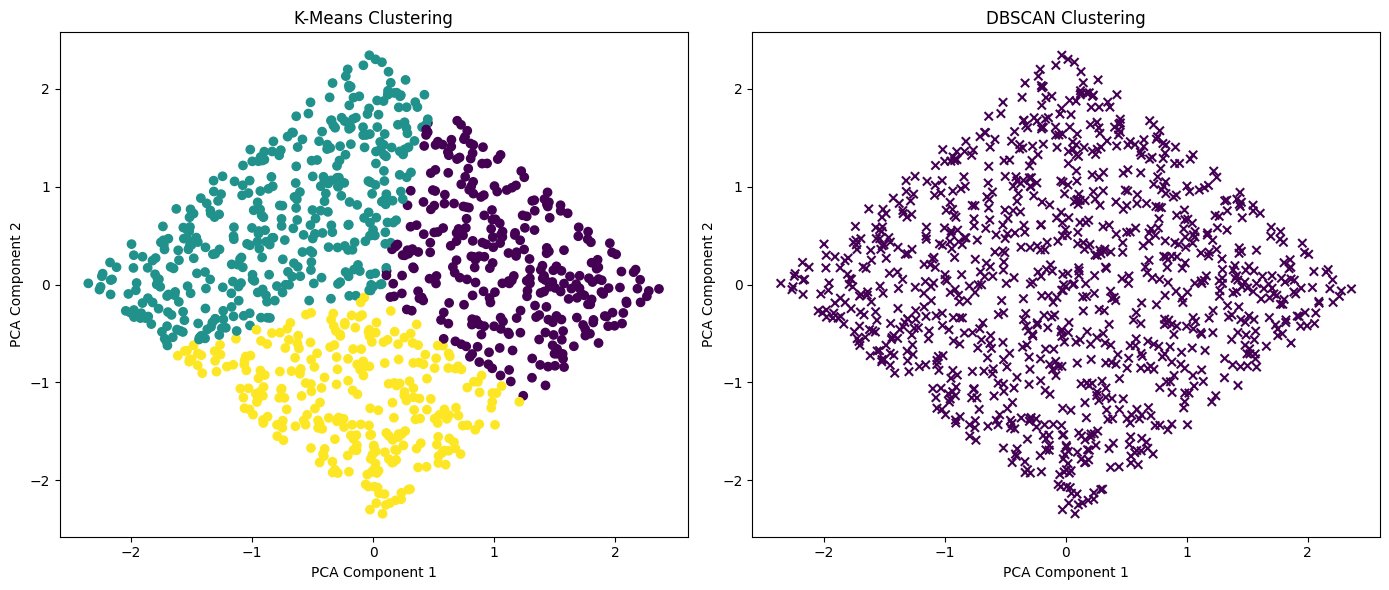

        date   in  out gid gid_key  KMeans_Cluster  DBSCAN_Cluster
0 2023-01-01  102  876   B    key2               0               0
1 2023-01-02  435    4   D    key3               2               0
2 2023-01-03  860  118   C    key1               1               0
3 2023-01-04  270  800   C    key3               0               0
4 2023-01-05  106  373   B    key3               2               0


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# 读取 Parquet 文件
file_path = "test_data.parquet"
df = pd.read_parquet(file_path)

# 1. 确保日期列是 Datetime 类型
df['date'] = pd.to_datetime(df['date'])

# 2. 进行标准化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['in', 'out']])

# 3. 使用 PCA 降维到 2D，以便可视化
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# 4. 使用 K-Means 聚类
kmeans = KMeans(n_clusters=3, random_state=42)  # 假设分为3个簇
kmeans_labels = kmeans.fit_predict(df_scaled)

# 5. 使用 DBSCAN 聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)  # 设置合理的eps和min_samples
dbscan_labels = dbscan.fit_predict(df_scaled)

# 6. 绘制 K-Means 聚类结果
plt.figure(figsize=(14, 6))

# K-Means
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='viridis', marker='x')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

# 输出聚类标签
df['KMeans_Cluster'] = kmeans_labels
df['DBSCAN_Cluster'] = dbscan_labels
print(df.head())


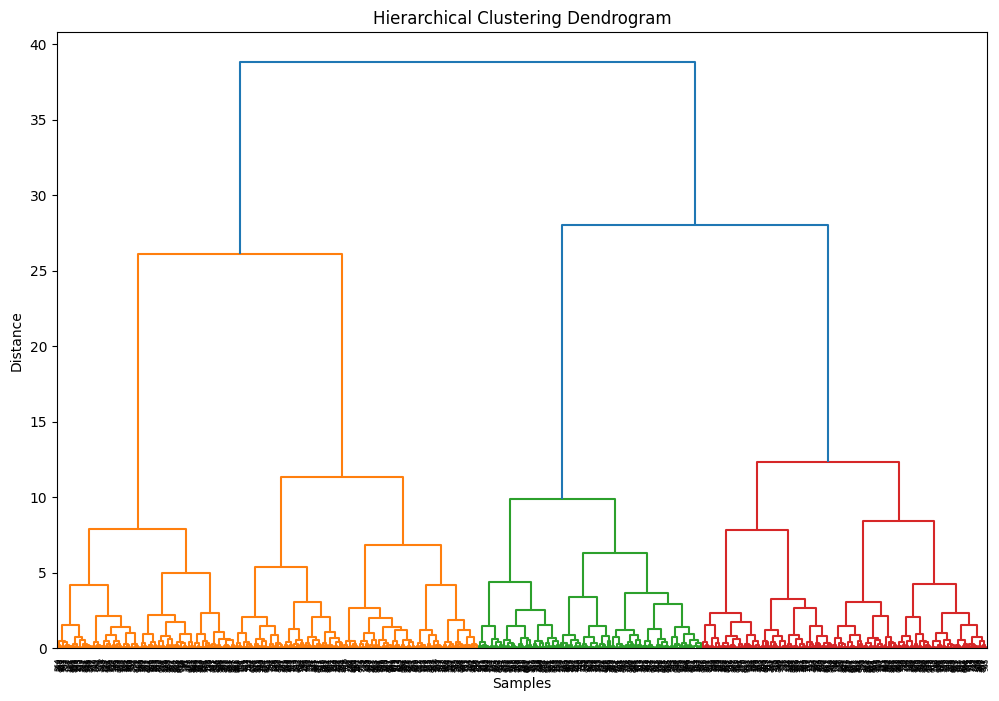

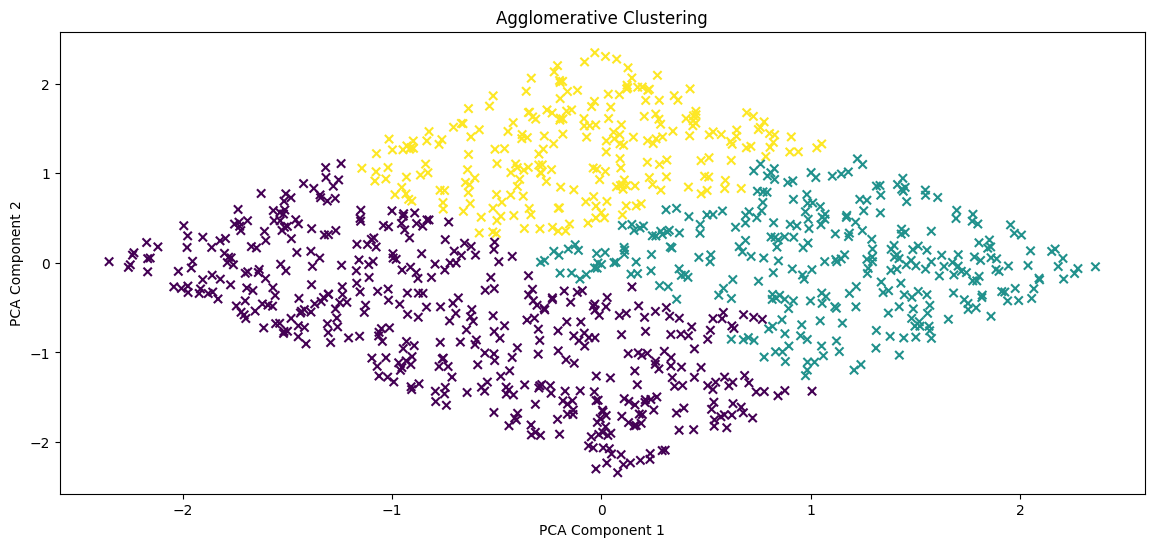

        date   in  out gid gid_key  KMeans_Cluster  DBSCAN_Cluster  \
0 2023-01-01  102  876   B    key2               0               0   
1 2023-01-02  435    4   D    key3               2               0   
2 2023-01-03  860  118   C    key1               1               0   
3 2023-01-04  270  800   C    key3               0               0   
4 2023-01-05  106  373   B    key3               2               0   

   Agglomerative_Cluster  
0                      1  
1                      0  
2                      0  
3                      1  
4                      0  


In [10]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# 层次聚类：使用 AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # 假设分为3个簇
agg_labels = agg_clustering.fit_predict(df_scaled)

# 画出树状图
plt.figure(figsize=(12, 8))
sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# 绘制聚类结果
plt.figure(figsize=(14, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=agg_labels, cmap='viridis', marker='x')
plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 输出聚类标签
df['Agglomerative_Cluster'] = agg_labels
print(df.head())


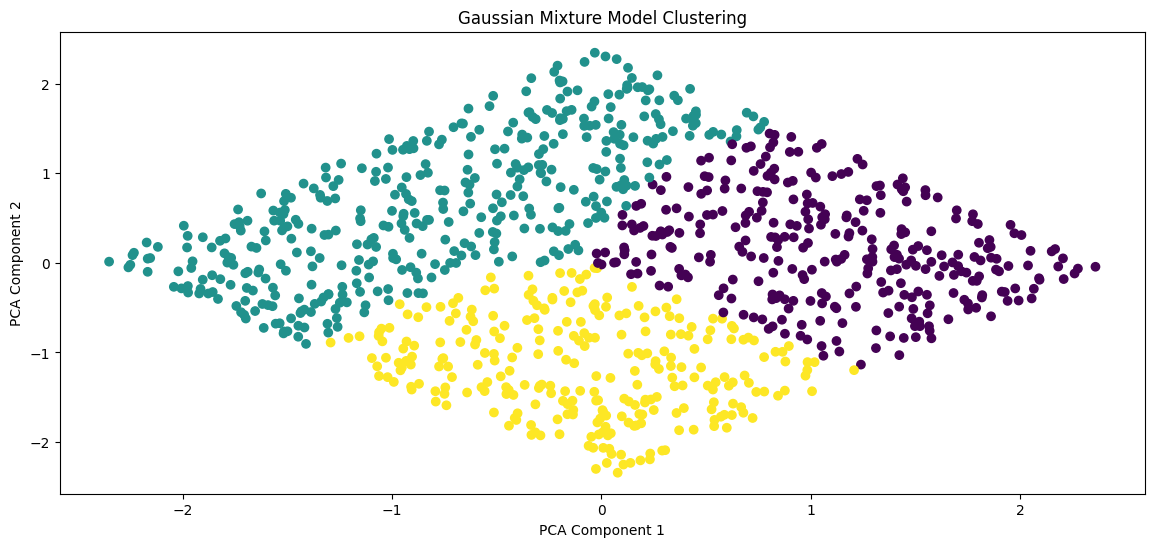

        date   in  out gid gid_key  KMeans_Cluster  DBSCAN_Cluster  \
0 2023-01-01  102  876   B    key2               0               0   
1 2023-01-02  435    4   D    key3               2               0   
2 2023-01-03  860  118   C    key1               1               0   
3 2023-01-04  270  800   C    key3               0               0   
4 2023-01-05  106  373   B    key3               2               0   

   Agglomerative_Cluster  GMM_Cluster  
0                      1            0  
1                      0            2  
2                      0            1  
3                      1            0  
4                      0            2  


In [11]:
from sklearn.mixture import GaussianMixture

# GMM 聚类
gmm = GaussianMixture(n_components=3, random_state=42)  # 假设分为3个簇
gmm_labels = gmm.fit_predict(df_scaled)

# 绘制 GMM 聚类结果
plt.figure(figsize=(14, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=gmm_labels, cmap='viridis', marker='o')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 输出聚类标签
df['GMM_Cluster'] = gmm_labels
print(df.head())


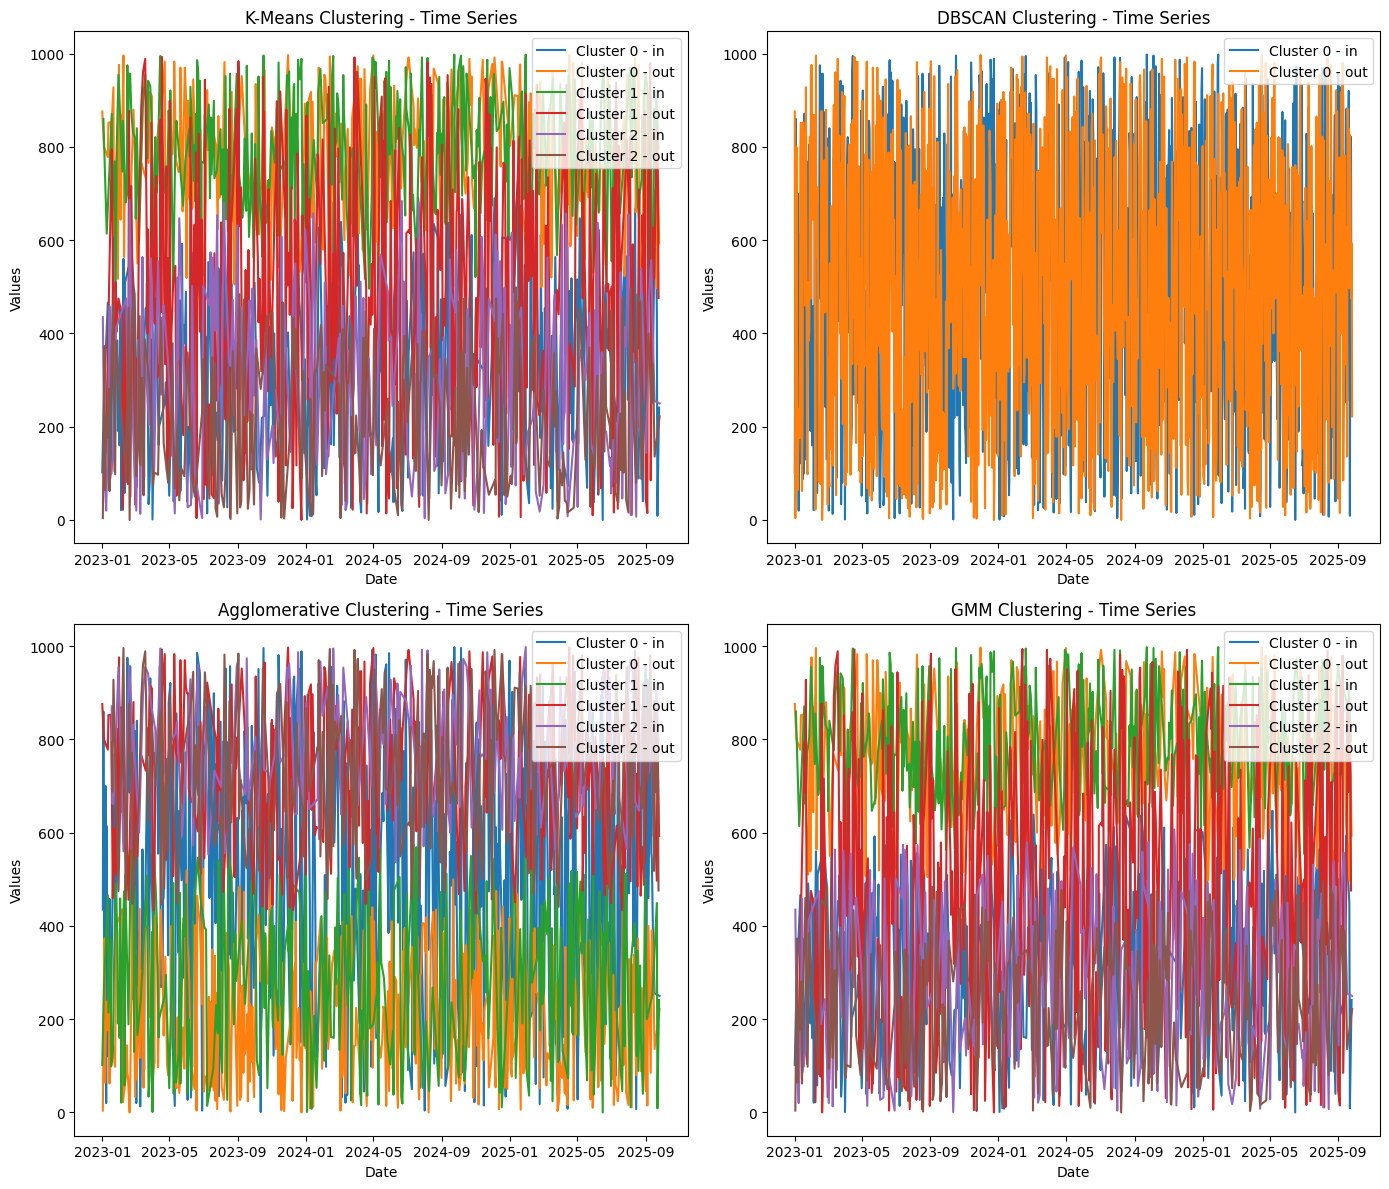


KMeans Clustering - Standard Deviations:
Cluster 0: in std = 194.45, out std = 139.75
Cluster 1: in std = 123.69, out std = 273.53
Cluster 2: in std = 182.83, out std = 142.22

DBSCAN Clustering - Standard Deviations:
Cluster 0: in std = 290.00, out std = 298.60

Agglomerative Clustering - Standard Deviations:
Cluster 0: in std = 292.12, out std = 133.57
Cluster 1: in std = 170.33, out std = 157.67
Cluster 2: in std = 122.01, out std = 160.39

GMM Clustering - Standard Deviations:
Cluster 0: in std = 182.29, out std = 141.72
Cluster 1: in std = 114.23, out std = 295.89
Cluster 2: in std = 168.23, out std = 140.58

Cluster Distances (Euclidean):

KMeans Clustering:
Distance between Cluster 0 and Cluster 2: 561.17
Distance between Cluster 0 and Cluster 1: 561.70
Distance between Cluster 2 and Cluster 1: 560.86

DBSCAN Clustering:

Agglomerative Clustering:
Distance between Cluster 1 and Cluster 0: 561.47
Distance between Cluster 1 and Cluster 2: 495.01
Distance between Cluster 0 and Clu

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

# 读取数据
file_path = "test_data.parquet"
df = pd.read_parquet(file_path)
df['date'] = pd.to_datetime(df['date'])  # 确保日期是 Datetime 类型

# 标准化数据
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['in', 'out']])

# 使用 PCA 降维以便可视化
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# K-Means 聚类
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
df['KMeans_Cluster'] = kmeans_labels

# DBSCAN 聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

# Agglomerative 聚类
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(df_scaled)
df['Agglomerative_Cluster'] = agg_labels

# GMM 聚类
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)
df['GMM_Cluster'] = gmm_labels

# 可视化每个簇的时序数据并计算标准差
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# K-Means 时序可视化
for label in np.unique(kmeans_labels):
    cluster_data = df[df['KMeans_Cluster'] == label]
    axes[0, 0].plot(cluster_data['date'], cluster_data['in'], label=f'Cluster {label} - in')
    axes[0, 0].plot(cluster_data['date'], cluster_data['out'], label=f'Cluster {label} - out')

axes[0, 0].set_title('K-Means Clustering - Time Series')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Values')
axes[0, 0].legend()

# DBSCAN 时序可视化
for label in np.unique(dbscan_labels):
    cluster_data = df[df['DBSCAN_Cluster'] == label]
    axes[0, 1].plot(cluster_data['date'], cluster_data['in'], label=f'Cluster {label} - in')
    axes[0, 1].plot(cluster_data['date'], cluster_data['out'], label=f'Cluster {label} - out')

axes[0, 1].set_title('DBSCAN Clustering - Time Series')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Values')
axes[0, 1].legend()

# Agglomerative 时序可视化
for label in np.unique(agg_labels):
    cluster_data = df[df['Agglomerative_Cluster'] == label]
    axes[1, 0].plot(cluster_data['date'], cluster_data['in'], label=f'Cluster {label} - in')
    axes[1, 0].plot(cluster_data['date'], cluster_data['out'], label=f'Cluster {label} - out')

axes[1, 0].set_title('Agglomerative Clustering - Time Series')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Values')
axes[1, 0].legend()

# GMM 时序可视化
for label in np.unique(gmm_labels):
    cluster_data = df[df['GMM_Cluster'] == label]
    axes[1, 1].plot(cluster_data['date'], cluster_data['in'], label=f'Cluster {label} - in')
    axes[1, 1].plot(cluster_data['date'], cluster_data['out'], label=f'Cluster {label} - out')

axes[1, 1].set_title('GMM Clustering - Time Series')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Values')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# 计算每个簇的标准差
for method in ['KMeans', 'DBSCAN', 'Agglomerative', 'GMM']:
    print(f"\n{method} Clustering - Standard Deviations:")
    for label in np.unique(df[f'{method}_Cluster']):
        cluster_data = df[df[f'{method}_Cluster'] == label]
        in_std = cluster_data['in'].std()
        out_std = cluster_data['out'].std()
        print(f"Cluster {label}: in std = {in_std:.2f}, out std = {out_std:.2f}")

# 计算每个簇之间的距离（欧氏距离）
print("\nCluster Distances (Euclidean):")
methods = ['KMeans', 'DBSCAN', 'Agglomerative', 'GMM']
for method in methods:
    print(f"\n{method} Clustering:")
    labels = df[f'{method}_Cluster'].unique()
    for i, label_1 in enumerate(labels):
        for label_2 in labels[i+1:]:
            cluster_1_center = df[df[f'{method}_Cluster'] == label_1][['in', 'out']].mean().values
            cluster_2_center = df[df[f'{method}_Cluster'] == label_2][['in', 'out']].mean().values
            distance = np.linalg.norm(cluster_1_center - cluster_2_center)
            print(f"Distance between Cluster {label_1} and Cluster {label_2}: {distance:.2f}")


K-Means Clustering - gid_key Distribution by Cluster:
gid_key         key1  key2  key3
KMeans_Cluster                  
0                116    99    99
1                125   153   122
2                 90   101    95


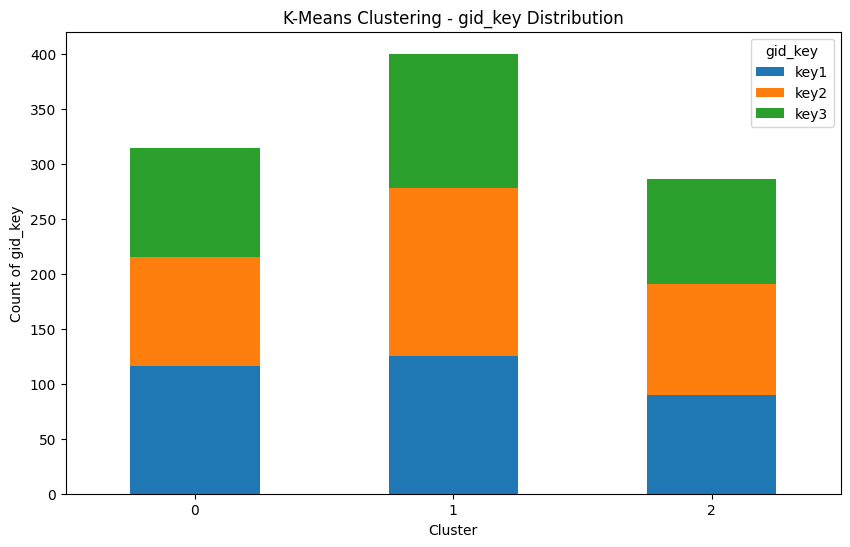


gid_key to Cluster Mapping:
{'key1': 1, 'key2': 0, 'key3': 2}


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 读取数据
file_path = "test_data.parquet"
df = pd.read_parquet(file_path)
df['date'] = pd.to_datetime(df['date'])  # 确保日期是 Datetime 类型

# 对数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['in', 'out']])

# 使用 K-Means 进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
df['KMeans_Cluster'] = kmeans_labels

# 查看每个簇的 gid_key 分布
cluster_gidkey_dist = df.groupby(['KMeans_Cluster', 'gid_key']).size().unstack(fill_value=0)

# 打印每个簇内 gid_key 的分布
print("K-Means Clustering - gid_key Distribution by Cluster:")
print(cluster_gidkey_dist)

# 可视化每个簇内 gid_key 的分布
cluster_gidkey_dist.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('K-Means Clustering - gid_key Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count of gid_key')
plt.xticks(rotation=0)
plt.show()

# 为每个 gid_key 创建一个簇标签的映射
gidkey_to_cluster = df.groupby('gid_key')['KMeans_Cluster'].first().to_dict()

# 打印 gid_key 到簇标签的映射
print("\ngid_key to Cluster Mapping:")
print(gidkey_to_cluster)


In [ ]:
# 时序分析可以帮助你发现数据中的长期趋势、季节性变化等特征。
# 异常值检测有助于识别数据中的潜在异常情况，帮助你做出及时的响应。
# 时间序列预测能够为未来的事件预测提供依据，支持决策制定。
# 相关性分析可以帮助你识别特征间的潜在关系。
# 分布分析揭示数据的基本统计特征，帮助你了解数据的分散程度。
# 聚合分析可以帮助你从不同的角度理解数据。
# 因果关系分析可以帮助你理解变量间的因果关系。

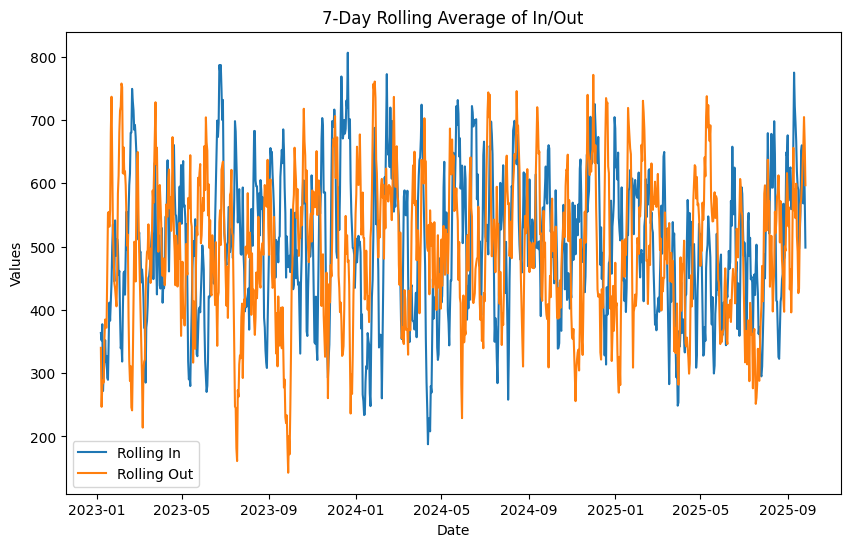

In [14]:
# 计算滚动平均（7天）
df['rolling_in'] = df['in'].rolling(window=7).mean()
df['rolling_out'] = df['out'].rolling(window=7).mean()

# 可视化趋势
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['rolling_in'], label='Rolling In')
plt.plot(df['date'], df['rolling_out'], label='Rolling Out')
plt.title('7-Day Rolling Average of In/Out')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


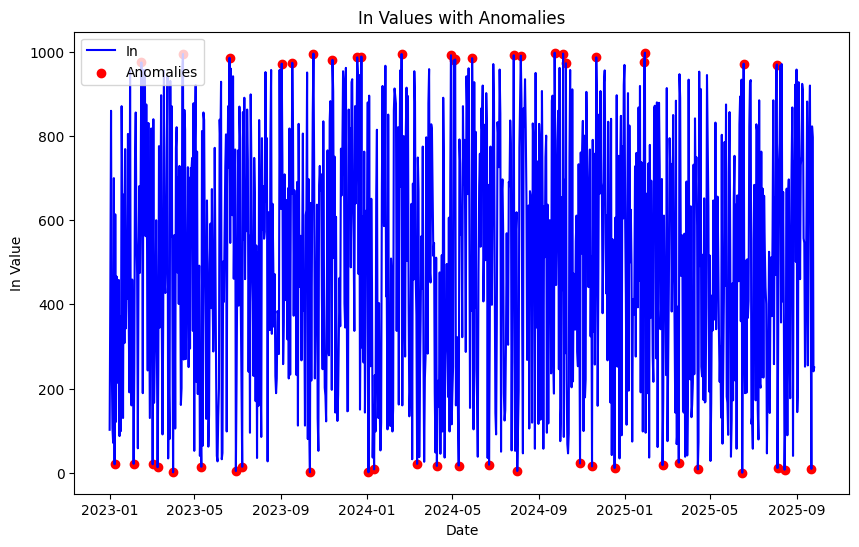

In [15]:
from sklearn.ensemble import IsolationForest

# 使用IsolationForest检测异常
isolation_forest = IsolationForest(contamination=0.05)
df['anomaly_in'] = isolation_forest.fit_predict(df[['in']])
df['anomaly_out'] = isolation_forest.fit_predict(df[['out']])

# 可视化异常值
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['in'], label='In', color='blue')
plt.scatter(df[df['anomaly_in'] == -1]['date'], df[df['anomaly_in'] == -1]['in'], color='red', label='Anomalies')
plt.title('In Values with Anomalies')
plt.xlabel('Date')
plt.ylabel('In Value')
plt.legend()
plt.show()


Correlation Matrix:
            in       out
in   1.000000 -0.015338
out -0.015338  1.000000


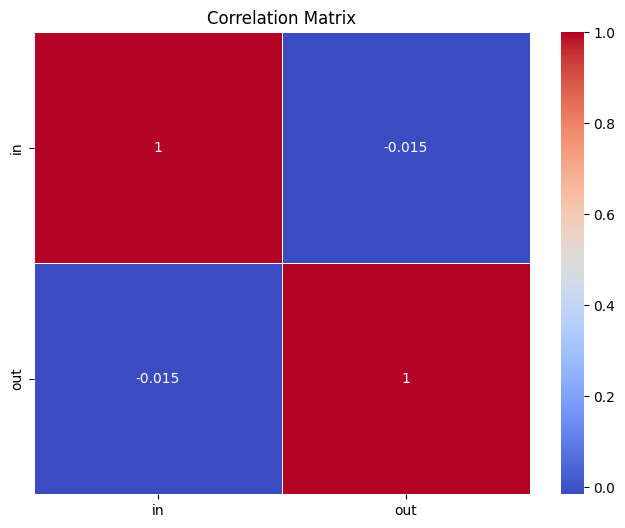

In [18]:
# 计算皮尔逊相关系数
correlation = df[['in', 'out']].corr()
print("Correlation Matrix:\n", correlation)

# 可视化相关性矩阵
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


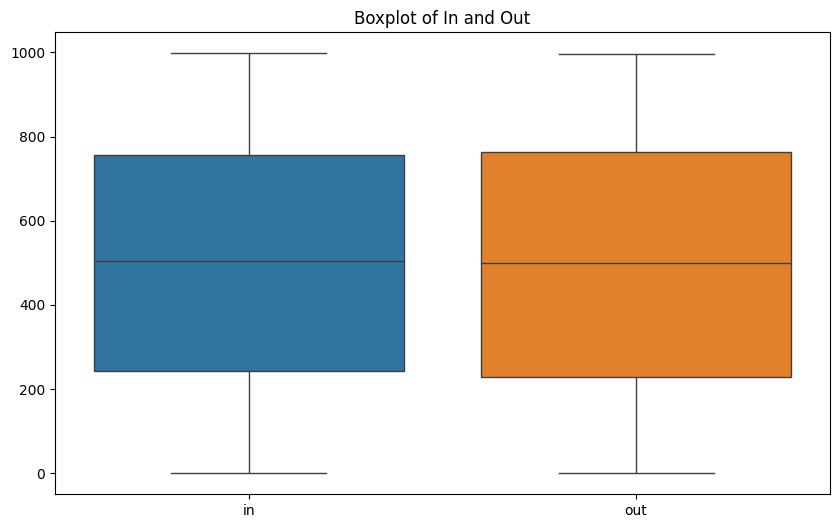

In [19]:
# 绘制箱线图
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['in', 'out']])
plt.title('Boxplot of In and Out')
plt.show()


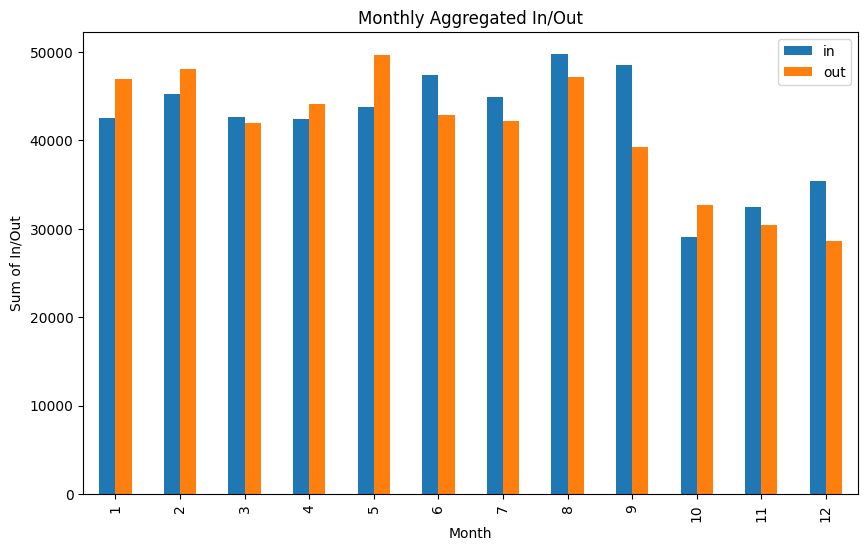

In [20]:
# 按月聚合数据
df['month'] = df['date'].dt.month
monthly_data = df.groupby('month')[['in', 'out']].sum()

# 可视化按月聚合的数据
monthly_data.plot(kind='bar', figsize=(10,6))
plt.title('Monthly Aggregated In/Out')
plt.xlabel('Month')
plt.ylabel('Sum of In/Out')
plt.show()


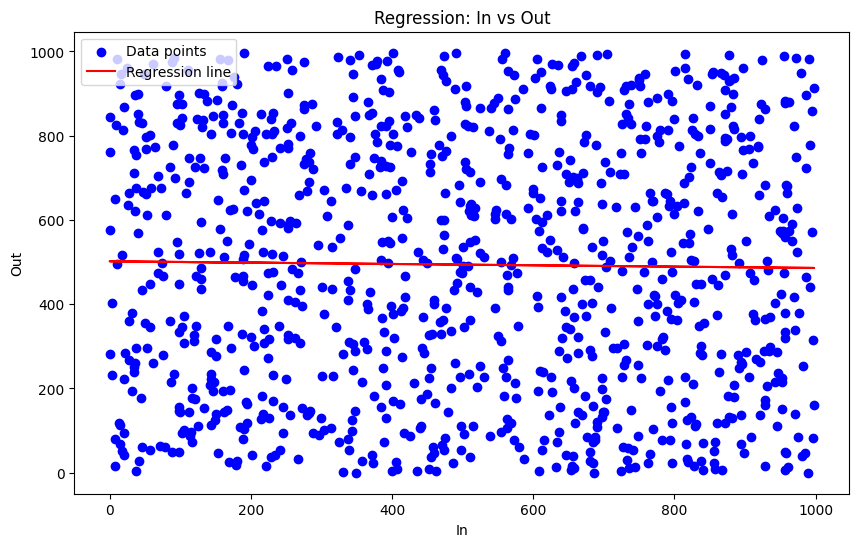

In [21]:
from sklearn.linear_model import LinearRegression

# 线性回归模型预测 'out' 值
X = df[['in']]  # 自变量：in
y = df['out']   # 因变量：out

model = LinearRegression()
model.fit(X, y)

# 可视化回归结果
plt.figure(figsize=(10,6))
plt.scatter(df['in'], df['out'], color='blue', label='Data points')
plt.plot(df['in'], model.predict(X), color='red', label='Regression line')
plt.title('Regression: In vs Out')
plt.xlabel('In')
plt.ylabel('Out')
plt.legend()
plt.show()
